sauce
https://www.youtube.com/watch?v=JoQhEKh7u0c

https://www.youtube.com/watch?v=3_2YDEpR3k0

https://autogis-site.readthedocs.io/en/2020_/notebooks/L5/02_interactive-map-folium.html

https://tanahair.indonesia.go.id/portal-web/bencana/metadata_bali.html

https://www.youtube.com/watch?v=JoQhEKh7u0c
https://www.youtube.com/watch?v=oFajY3FOq6A&t=925s

Pre-requisite
hanya sebagian besar projek di bawah akan di pakai sebagai dasar.



In [ ]:
!pip install pandas
!pip install shapely
!pip install fiona
!pip install pyproj
!pip install packaging
!pip install geopandas

!pip install folium
!pip install matplotlib
!pip install mapclassify
#!pip install glob

menyingkatkan Pandas dan Geopandas menjadi pd dan gpd

In [ ]:
import pandas as pd
import geopandas as gpd

ambil data

Menggunakan Geopandas untuk meliah 5 data pertama pada file geojson.
note, bali_2 (Estimasi_Bangunan_KRB_Gunung_Agung.geojson) tidak saya lihat lagi pada peta karena nga-lag.

In [ ]:
#bali_1 = gpd.read_file("/content/Permukiman.geojson")
#bali_1 = gpd.read_file("Permukiman.geojson")
bali_1 = gpd.read_file("https://github.com/AdamAkhmadShobari/school-uas-geo/blob/main/Permukiman.geojson")

#bali_2 = gpd.read_file("/content/Estimasi_Bangunan_KRB_Gunung_Agung.geojson")
#bali_2 = gpd.read_file("Estimasi_Bangunan_KRB_Gunung_Agung.geojson")
bali_2 = gpd.read_file("https://github.com/AdamAkhmadShobari/school-uas-geo/blob/main/Estimasi_Bangunan_KRB_Gunung_Agung.geojson")

#bali_3 = gpd.read_file("/content/zona_KRB_Agung_AR.geojson")
#bali_3 = gpd.read_file("zona_KRB_Agung_AR.geojson")
bali_3 = gpd.read_file("https://github.com/AdamAkhmadShobari/school-uas-geo/blob/main/zona_KRB_Agung_AR.geojson")


#bali_4 = gpd.read_file("/content/Ruas_Jalan.geojson")
#bali_4 = gpd.read_file("Ruas_Jalan.geojson")
bali_4 = gpd.read_file("https://github.com/AdamAkhmadShobari/school-uas-geo/blob/main/Ruas_Jalan.geojson")

Read in Pemukiman, KRB, dan

In [ ]:
bali_1.head()

,NAMOBJ,FCODE,REMARK,SRS_ID,LCODE,METADATA,SHAPE_Leng,SHAPE_Area,geometry
0,None,None,Permukiman dan Tempat Kegiatan,None,GA0040,None,0.038717,0.000023,"POLYGON Z ((115.61505 -8.41370 0.00000, 115.61..."
1,None,None,Permukiman dan Tempat Kegiatan,None,GA0040,None,0.075552,0.000051,"POLYGON Z ((115.56798 -8.47327 0.00000, 115.56..."
2,None,None,Permukiman dan Tempat Kegiatan,None,GA0040,None,0.014714,0.000006,"POLYGON Z ((115.51953 -8.47532 0.00000, 115.51..."
3,None,None,Permukiman dan Tempat Kegiatan,None,GA0040,None,0.017429,0.000010,"POLYGON Z ((115.61505 -8.41370 0.00000, 115.61..."
4,None,None,Permukiman dan Tempat Kegiatan,None,GA0040,None,0.120712,0.000110,"POLYGON Z ((115.57950 -8.39326 0.00000, 115.57..."


In [ ]:
bali_2.head()

,OBJECTID_1,KELAS_KRB,DESA,KECAMATAN,REGION,KABUPATEN,PROVINSI,NEGARA,X_COORD,Y_COORD,geometry
0,1,KRB II,TIANYAR,KUBU,JAWA,KARANGASEM,BALI,INDONESIA,115.50381,-8.20314,POINT (115.50381 -8.20314)
1,2,KRB II,TIANYAR,KUBU,JAWA,KARANGASEM,BALI,INDONESIA,115.50428,-8.20294,POINT (115.50428 -8.20294)
2,3,KRB II,TIANYAR,KUBU,JAWA,KARANGASEM,BALI,INDONESIA,115.50500,-8.20317,POINT (115.50500 -8.20317)
3,4,KRB II,TIANYAR,KUBU,JAWA,KARANGASEM,BALI,INDONESIA,115.50542,-8.20392,POINT (115.50542 -8.20392)
4,5,KRB II,TIANYAR,KUBU,JAWA,KARANGASEM,BALI,INDONESIA,115.50569,-8.20517,POINT (115.50569 -8.20517)


In [ ]:
bali_3.head()

In [ ]:
bali_4.head()

Plot di pakai untuk meliah bentuk file bila di gambar tetapi tanpa peta

<Axes: >

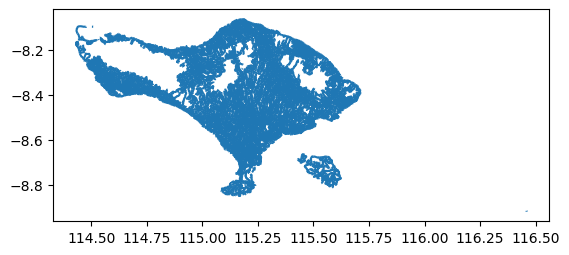

In [ ]:
##bali_1.plot()
#bali_2.plot()
#bali_3.plot()
bali_4.plot()

Mengambil data-data yang relevan, fillna(0) digunakan untuk memenuhi data kosong dengan (0)

In [ ]:
bali_1 = bali_1[['REMARK','LCODE','SHAPE_Leng','SHAPE_Area','geometry']].fillna(0)
bali_2 = bali_2[['OBJECTID_1','X_COORD','Y_COORD','geometry']].fillna(0)
bali_3 = bali_3[['Id','UNSUR','KETERANGAN','FCODE','geometry']].fillna(0)
bali_4 = bali_4[['OBJECTID','SHAPE_Leng','geometry']].fillna(0)

Melihat data langsung pada peta

In [ ]:
import folium
p = bali_1.explore()
#p = bali_2.explore()
#p = bali_3.explore()
#p = bali_4.explore()
folium.LayerControl().add_to(p)
p


Output hidden; open in https://colab.research.google.com to view.

Peta yang di gambar dapat di simpan dalam bentuk HTML

In [ ]:
p.save("peta pemmukiman bali.html")

Petama Mengubah data menjadi geojson, saya mencoba langsung tanpa step ini dan gagal

In [ ]:
import folium

bali_1_gjson = folium.features.GeoJson(bali_1, name="bali_11")
bali_2_gjson = folium.features.GeoJson(bali_2, name="bali_22")
bali_3_gjson = folium.features.GeoJson(bali_3, name="bali_33")
bali_4_gjson = folium.features.GeoJson(bali_4, name="bali_44")



Meliahat beberapa data secara langsung pada peta dimana titik tengah adalah [-8.335925478687802, 115.50682806779031] dan mulai pada zoom_start=11.
menggunakan layercontrol kita dapat mengatur data apa saja yang dapat di lihat.

In [ ]:
p = folium.Map(location = [-8.335925478687802, 115.50682806779031],  zoom_start=11 )
bali_1_gjson.add_to(p)
#bali_2_gjson.add_to(p) do not use lag
bali_3_gjson.add_to(p)
#bali_4_gjson.add_to(p)
folium.LayerControl().add_to(p)
p

Output hidden; open in https://colab.research.google.com to view.

unused

In [ ]:
import fiona
import folium
import geopandas as gpd
from glob import glob

In [ ]:
files = glob("/content/*")

['/content/Estimasi_Bangunan_KRB_Gunung_Agung.geojson',
 '/content/zona_KRB_Agung_AR.geojson',
 '/content/Permukiman.geojson',
 '/content/Ruas_Jalan.geojson',
 '/content/sample_data']

In [ ]:
df_list =[]
for file in files:
  df_list.append()